In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('train.csv')
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [2]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [3]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64

In [4]:
dfSatisfied=df[df['satisfaction'] == 'satisfied']
dfDisatisfied=df[df['satisfaction'] == 'neutral or dissatisfied']

In [5]:
dfSatisfied.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,45025.000000,44897.000000
mean,51789.242754,65512.609928,41.750583,1530.140255,3.161288,2.970305,3.031582,2.977879,3.521310,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342,12.608084,12.630799
std,30016.277260,37347.622538,12.767833,1128.126574,1.588697,1.552213,1.575306,1.374244,1.236187,1.191609,1.142077,1.076907,1.127130,1.175515,1.099607,1.158732,1.091486,1.142247,35.382595,35.962008
min,2.000000,2.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,25679.000000,33366.000000,32.000000,526.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
50%,51695.000000,65862.000000,43.000000,1250.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000
75%,77741.000000,97691.000000,51.000000,2405.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,9.000000,8.000000
max,103900.000000,129879.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
dfDisatisfied.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58879.000000,58697.000000
mean,52075.578746,64474.259176,37.566688,928.919971,2.399633,3.129112,2.546850,2.976121,2.958050,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123,16.503728,17.127536
std,29977.755481,37546.516040,16.459825,790.452308,0.964348,1.500368,1.205847,1.198500,1.346607,1.145905,1.303142,1.323619,1.285790,1.303159,1.176978,1.281158,1.175603,1.325955,40.191886,40.560248
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26174.500000,31835.500000,25.000000,372.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,52130.000000,63970.000000,36.000000,671.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,78063.500000,97144.500000,50.000000,1158.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,15.000000,17.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
dfSatisfied

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
13,13,83502,Male,Loyal Customer,33,Personal Travel,Eco,946,4,2,...,4,4,5,2,2,2,4,0,0.0,satisfied
16,16,71142,Female,Loyal Customer,26,Business travel,Business,2123,3,3,...,4,5,3,4,5,4,4,49,51.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103890,103890,80087,Female,Loyal Customer,56,Business travel,Eco Plus,550,3,5,...,3,3,3,3,4,3,3,0,0.0,satisfied
103891,103891,83013,Male,Loyal Customer,54,Business travel,Business,1991,5,5,...,4,4,5,4,5,4,4,35,31.0,satisfied
103894,103894,86549,Male,Loyal Customer,26,Business travel,Business,712,4,4,...,5,3,4,4,3,4,5,17,26.0,satisfied
103897,103897,102203,Female,Loyal Customer,60,Business travel,Business,1599,5,5,...,4,4,4,4,4,4,4,9,7.0,satisfied


In [8]:
def clean_airloops_data(df):
    # 1. Handle Missing Values: Fill 'Arrival Delay in Minutes' with the median
    median_delay = df['Arrival Delay in Minutes'].median()
    df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

    # Note: If 'Inflight wifi service' has nulls (which it often does),
    # we can fill those with 0, assuming 'No Service' or 'Not Applicable'.
    if 'Inflight wifi service' in df.columns and df['Inflight wifi service'].isnull().any():
        df['Inflight wifi service'].fillna(0, inplace=True)

    # 2. Drop Unnecessary Columns
    cols_to_drop = ['Unnamed: 0']
    df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

    # 3. Create the Target Variable (satisfaction_binary)
    # Using .map() is a simple, clear way to do binary encoding.
    satisfaction_map = {'satisfied': 1, 'neutral or dissatisfied': 0}
    df['satisfaction_binary'] = df['satisfaction'].map(satisfaction_map)
    df.drop(columns=['satisfaction'], inplace=True)

    # 4. Format Column Names (Lowercase and Underscore)
    df.columns = df.columns.str.lower().str.replace(' ', '_')

    print("\nData cleaning complete. Ready for analysis!")
    return df

# Apply the function to your DataFrame
df_cleaned = clean_airloops_data(df.copy())


Data cleaning complete. Ready for analysis!


C:\Users\Marta\AppData\Local\Temp\ipykernel_29024\1995285321.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)


In [9]:
# 1. Check Class Distribution (How many passengers in each class?)
print("--- Class Distribution ---")
print(df_cleaned['class'].value_counts())
print("-" * 30)

# 2. Calculate Mean Satisfaction by Class
# The mean of 'satisfaction_binary' is the percentage of satisfied customers (1s)
satisfaction_by_class = df_cleaned.groupby('class')['satisfaction_binary'].mean().sort_values(ascending=False)

print("\n--- Average Satisfaction by Class ---")
print(satisfaction_by_class)

--- Class Distribution ---
class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
------------------------------

--- Average Satisfaction by Class ---
class
Business    0.694251
Eco Plus    0.246064
Eco         0.186138
Name: satisfaction_binary, dtype: float64


Plot saved as 'satisfaction_by_class_bar_chart.png'


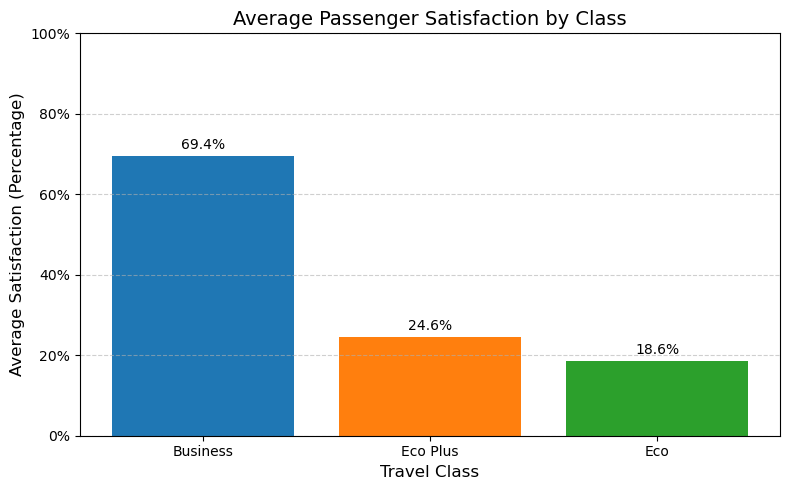

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# The results you provided, stored in a DataFrame for plotting
satisfaction_data = {
    'Class': ['Business', 'Eco Plus', 'Eco'],
    'Average_Satisfaction': [0.694251, 0.246064, 0.186138]
}
plot_df = pd.DataFrame(satisfaction_data)

# Sort the data for a cleaner visual presentation (highest to lowest)
plot_df = plot_df.sort_values(by='Average_Satisfaction', ascending=False)

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(plot_df['Class'], plot_df['Average_Satisfaction'], color=['#1f77b4', '#ff7f0e', '#2ca02c']) # Custom colors for visual separation

# Add labels and title
plt.title('Average Passenger Satisfaction by Class', fontsize=14)
plt.xlabel('Travel Class', fontsize=12)
plt.ylabel('Average Satisfaction (Percentage)', fontsize=12)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%']) # Format y-axis as percentages

# Add the percentage values on top of the bars for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.1%}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
plt.savefig('satisfaction_by_class_bar_chart.png')
print("Plot saved as 'satisfaction_by_class_bar_chart.png'")

In [11]:
#cleaned DataFrame is named 'df_cleaned'

# 1. Check Customer Type Distribution
print("--- Customer Type Distribution ---")
print(df_cleaned['customer_type'].value_counts())
print("-" * 30)

# 2. Calculate Mean Satisfaction by Customer Type
# The mean of 'satisfaction_binary' is the percentage of satisfied customers (1s)
satisfaction_by_customer_type = df_cleaned.groupby('customer_type')['satisfaction_binary'].mean().sort_values(ascending=False)

print("\n--- Average Satisfaction by Customer Type ---")
print(satisfaction_by_customer_type)

--- Customer Type Distribution ---
customer_type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
------------------------------

--- Average Satisfaction by Customer Type ---
customer_type
Loyal Customer       0.477291
disloyal Customer    0.236658
Name: satisfaction_binary, dtype: float64


Plot saved as 'satisfaction_by_customer_type_bar_chart.png'


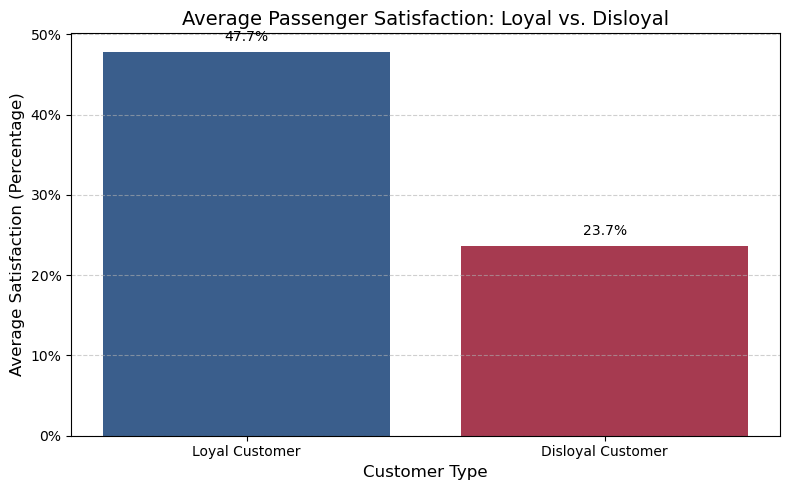

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# The results you provided, stored in a DataFrame for plotting
satisfaction_data = {
    'Customer_Type': ['Loyal Customer', 'Disloyal Customer'],
    'Average_Satisfaction': [0.477291, 0.236658]
}
plot_df_h2 = pd.DataFrame(satisfaction_data)

# Sort the data for presentation
plot_df_h2 = plot_df_h2.sort_values(by='Average_Satisfaction', ascending=False)

# Create the plot
plt.figure(figsize=(8, 5))
bars = plt.bar(plot_df_h2['Customer_Type'], plot_df_h2['Average_Satisfaction'], color=['#3a5e8c', '#a63a50'])

# Add labels and title
plt.title('Average Passenger Satisfaction: Loyal vs. Disloyal', fontsize=14)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Average Satisfaction (Percentage)', fontsize=12)
plt.yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5], ['0%', '10%', '20%', '30%', '40%', '50%'])

# Add the percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.1%}', ha='center', va='bottom', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
plt.savefig('satisfaction_by_customer_type_bar_chart.png')
print("Plot saved as 'satisfaction_by_customer_type_bar_chart.png'")

In [13]:
# Assuming your cleaned DataFrame is named 'df_cleaned'

# 1. Identify Service Columns (The columns with rating scores or delay metrics)
# We include all rating columns and the delay columns.
service_columns = [
    'inflight_wifi_service',
    'departure/arrival_time_convenient',
    'ease_of_online_booking',
    'gate_location',
    'food_and_drink',
    'online_boarding',
    'seat_comfort',
    'inflight_entertainment',
    'on-board_service',
    'leg_room_service',
    'baggage_handling',
    'checkin_service',
    'inflight_service',
    'cleanliness',
    'departure_delay_in_minutes',
    'arrival_delay_in_minutes'
]

# 2. Calculate Correlation with satisfaction_binary and sort the results
# The Pearson correlation coefficient (r) is used here.
correlation_results = df_cleaned[service_columns + ['satisfaction_binary']].corr()['satisfaction_binary'].sort_values(ascending=False)

# Remove the correlation of the target variable with itself (which is always 1)
correlation_results = correlation_results.drop('satisfaction_binary')

print("--- Correlation of Service Features with Satisfaction (r value) ---")
print(correlation_results)

--- Correlation of Service Features with Satisfaction (r value) ---
online_boarding                      0.503557
inflight_entertainment               0.398059
seat_comfort                         0.349459
on-board_service                     0.322383
leg_room_service                     0.313131
cleanliness                          0.305198
inflight_wifi_service                0.284245
baggage_handling                     0.247749
inflight_service                     0.244741
checkin_service                      0.236174
food_and_drink                       0.209936
ease_of_online_booking               0.171705
gate_location                        0.000682
departure_delay_in_minutes          -0.050494
departure/arrival_time_convenient   -0.051601
arrival_delay_in_minutes            -0.057435
Name: satisfaction_binary, dtype: float64


Plot saved as 'service_correlation_bar_chart.png'


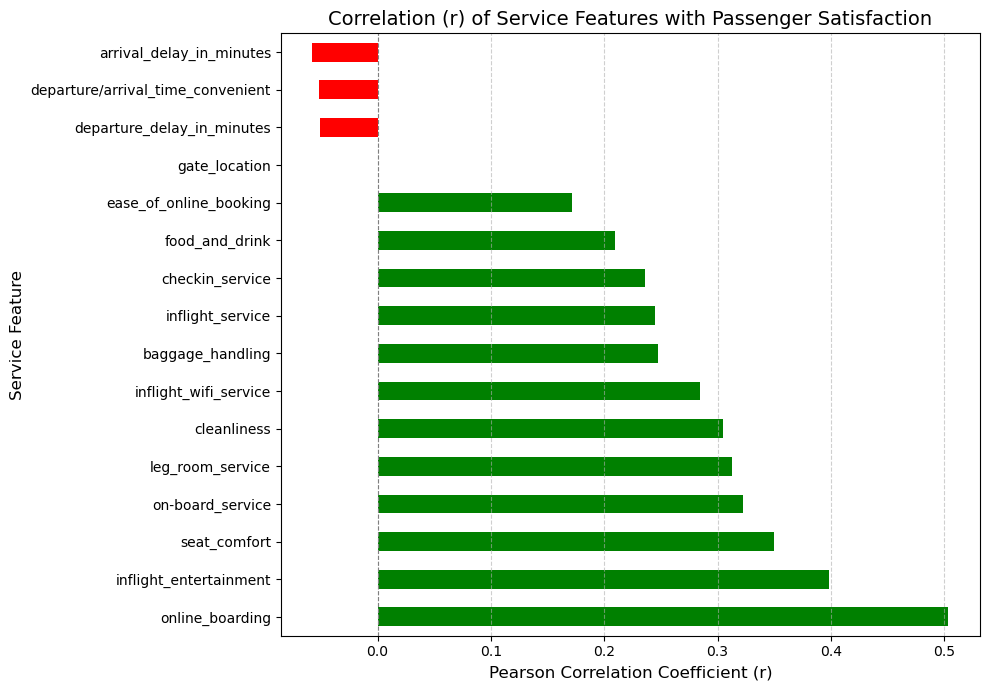

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# The results you provided, stored in a Series for plotting
data = {
    'online_boarding': 0.503557,
    'inflight_entertainment': 0.398059,
    'seat_comfort': 0.349459,
    'on-board_service': 0.322383,
    'leg_room_service': 0.313131,
    'cleanliness': 0.305198,
    'inflight_wifi_service': 0.284245,
    'baggage_handling': 0.247749,
    'inflight_service': 0.244741,
    'checkin_service': 0.236174,
    'food_and_drink': 0.209936,
    'ease_of_online_booking': 0.171705,
    'gate_location': 0.000682,
    'departure_delay_in_minutes': -0.050494,
    'departure/arrival_time_convenient': -0.051601,
    'arrival_delay_in_minutes': -0.057435
}

correlation_results = pd.Series(data)

# Create the plot
plt.figure(figsize=(10, 7))

# Define colors: Green for positive correlation, Red for negative
colors = ['g' if x > 0 else 'r' for x in correlation_results]

# Plot the horizontal bar chart
correlation_results.plot(kind='barh', color=colors)

# Add labels and title
plt.title('Correlation (r) of Service Features with Passenger Satisfaction', fontsize=14)
plt.xlabel('Pearson Correlation Coefficient (r)', fontsize=12)
plt.ylabel('Service Feature', fontsize=12)

# Add a vertical line at r=0 for reference
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save the plot
plt.savefig('service_correlation_bar_chart.png')
print("Plot saved as 'service_correlation_bar_chart.png'")